# Classification d'Images avec Transfer Learning

Ce projet vise à classifier les images de la base de données CIFAR-10 en exploitant des modèles de machine learning. L’objectif est de comparer les performances d’un Perceptron Multicouche (MLP) et d’un réseau de neurones convolutifs (CNN), tout en explorant l’apport du Transfer Learning pour améliorer la précision des prédictions.

Ces données dont disponibles sur keras.

# Présentation de la Base de Données
CIFAR-10 est un ensemble de données contenant 60 000 images en couleur (32x32 pixels), réparties en 10 classes représentant des objets courants : avions, automobiles, oiseaux, chats, cerfs, chiens, grenouilles, chevaux, bateaux et camions. Chaque classe comprend 6 000 images.



# Objectifs du Projet
Développer et comparer deux modèles de classification d’images : un MLP et un CNN. Expérimenter le Transfer Learning en utilisant un modèle pré-entraîné adapté à CIFAR-10.
Évaluer et comparer les performances des différentes approches.


# Étapes du Projet
*   **Exploration des Données :** Analyse et visualisation de l’ensemble de données
pour mieux comprendre sa structure.
*   **Prétraitement des Données : **Normalisation des images et autres transformations nécessaires.
*   **Modélisation :** Construction d’un modèle MLP pour la classification.
Développement d’un CNN optimisé pour CIFAR-10.
*    **Intégration du Transfer Learning à l’aide d’un modèle pré-entraîné.
Évaluation des Modèles :** Comparaison des performances à l’aide des données de test.


Ce projet permet de se familiariser avec la classification d’images, d’expérimenter différentes architectures de réseaux de neurones et d’analyser l’impact du Transfer Learning sur l’amélioration des performances.

# Exploration des Données :

In [1]:
# Importer des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [2]:
# Chargement des données
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Classes CIFAR-10
classes = ["Avion", "Automobile", "Oiseau", "Chat", "Cerf",
                   "Chien", "Grenouille", "Cheval", "Bateau", "Camion"]

print("Taille de l'ensemble d'entraînement (images) :", x_train.shape)
print("Taille de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Taille de l'ensemble de test :", x_test.shape)
print("Taille de l'ensemble de test :", y_test.shape)

Taille de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Taille de l'ensemble d'entraînement (étiquettes) : (50000, 1)
Taille de l'ensemble de test : (10000, 32, 32, 3)
Taille de l'ensemble de test : (10000, 1)


(50000, 32, 32, 3)
50000 images de taille 32*32
3 => RGB

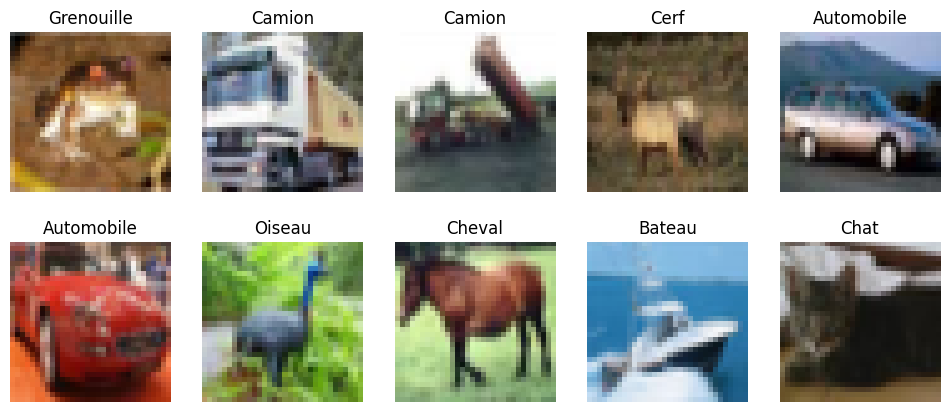

In [4]:
# Quelques exemples d'images et leurs étiquettes
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.show()

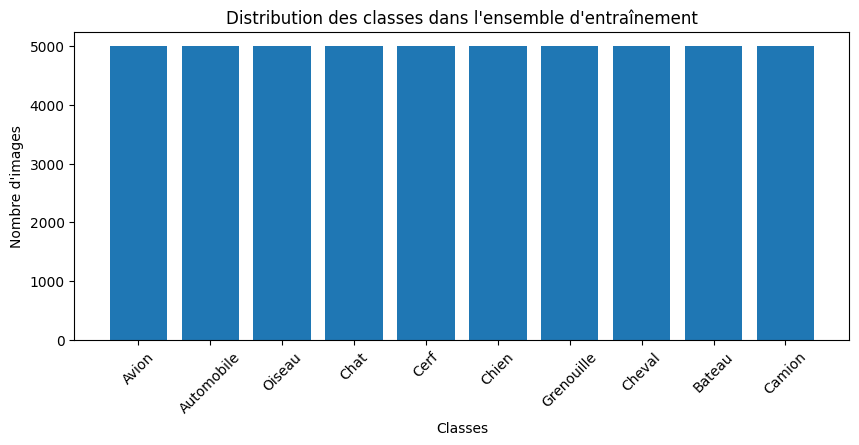

In [5]:
# Distribution des classes dans l'ensemble d'entraînement
c_distribution = [0] * 10
for label in y_train:
    c_distribution[label[0]] += 1

plt.figure(figsize=(10, 4))
plt.bar(classes, c_distribution)
plt.title("Distribution des classes dans l'ensemble d'entraînement")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show()

# Prétraitement des Données

In [6]:
# Normaliser les pixels des images en mettant à l'échelle entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
# Transformer les étiquettes en vecteurs one-hot (encodage catégoriel)
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [8]:
print("Taille de l'ensemble d'entraînement (images) :", x_train.shape)
print("Taille de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Taille de l'ensemble de test :", x_test.shape)
print("Taille de l'ensemble de test :", y_test.shape)

Taille de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Taille de l'ensemble d'entraînement (étiquettes) : (50000, 10)
Taille de l'ensemble de test : (10000, 32, 32, 3)
Taille de l'ensemble de test : (10000, 10)


# Modèle MLP

In [9]:
# Les imports
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# Définition du modèle
model_mlp = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Résumé du modèle
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
epochs = 100
batch_size = 32

historique = model_mlp.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

test_loss, test_accuracy = model_mlp.evaluate(x_test, y_test, verbose=2)

print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2305 - loss: 2.1232 - val_accuracy: 0.3516 - val_loss: 1.8521
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3512 - loss: 1.8303 - val_accuracy: 0.3467 - val_loss: 1.8378
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3717 - loss: 1.7745 - val_accuracy: 0.3830 - val_loss: 1.7546
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3857 - loss: 1.7308 - val_accuracy: 0.3772 - val_loss: 1.7743
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4031 - loss: 1.6993 - val_accuracy: 0.3890 - val_loss: 1.7337
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4062 - loss: 1.6740 - val_accuracy: 0.3951 - val_loss: 1.7249
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4126 - loss: 1.6618 - val_accuracy: 0.4035 - val_loss: 1.6960
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4163 - loss: 1.6480 - val_a

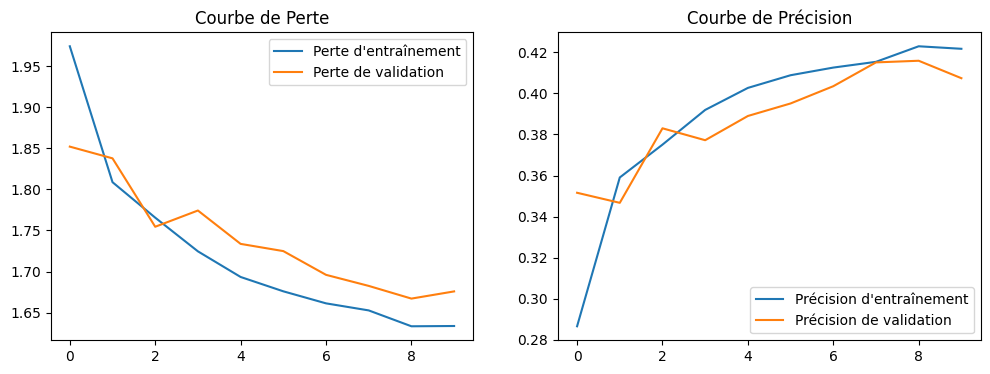

Précision sur les données de test : 41.38%


In [14]:
#Les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historique.history['loss'], label='Perte d\'entraînement')
plt.plot(historique.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(historique.history['accuracy'], label='Précision d\'entraînement')
plt.plot(historique.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

In [15]:
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédiction des classes pour les données de test
predictions = model_mlp.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
true_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


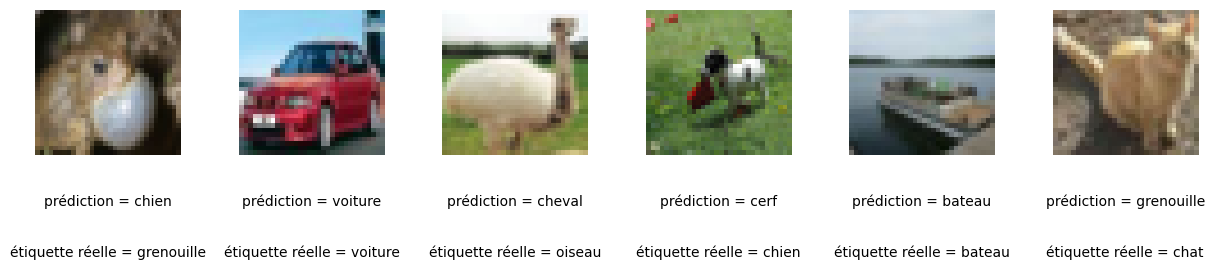

In [16]:
n_afficher = 6
indices = np.random.choice(range(len(x_test)), n_afficher)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(true_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)

plt.show()

# Réseau de neurone

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [18]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compilation du modèle
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [20]:
# Entraînement
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 82ms/step - accuracy: 0.2845 - loss: 1.9301 - val_accuracy: 0.5162 - val_loss: 1.3878
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.4868 - loss: 1.4311 - val_accuracy: 0.5738 - val_loss: 1.2313
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.5452 - loss: 1.2759 - val_accuracy: 0.6012 - val_loss: 1.1215
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.5859 - loss: 1.1755 - val_accuracy: 0.6280 - val_loss: 1.0507
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.6065 - loss: 1.1181 - val_accuracy: 0.6474 - val_loss: 1.0115
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.6273 - loss: 1.0580 - val_accuracy: 0.6629 - val_loss: 0.9721
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.6441 - loss: 1.0190 - val_accuracy: 0.6574 - val_loss: 0.9709
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6596 - loss: 0.9719 - 

313/313 - 4s - 12ms/step - accuracy: 0.6893 - loss: 0.8895
Précision sur les données de test : 68.93%


Text(0.5, 1.0, 'Courbe de Précision')

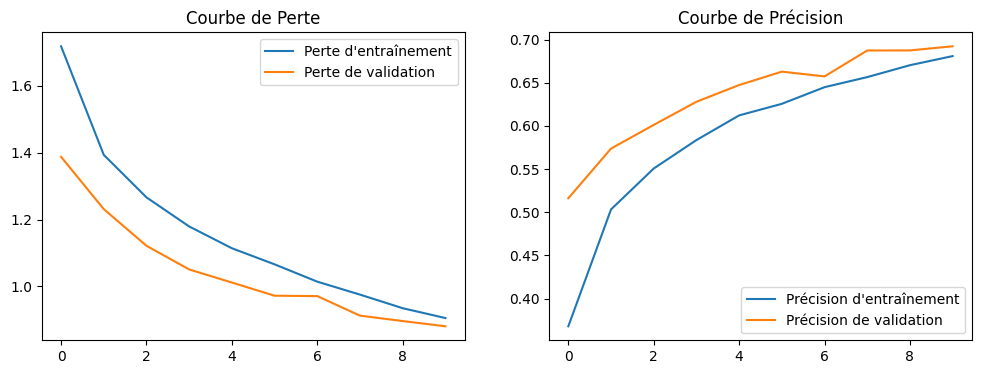

In [21]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')


In [22]:
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


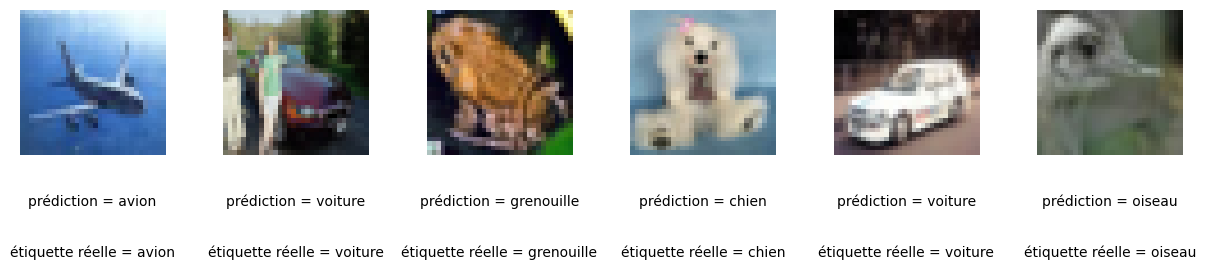

In [23]:
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)

plt.show()

# Autre structure de CNN

In [24]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [25]:
NUM_CLASSES = 10

model_cnn = models.Sequential()

model_cnn.add(layers.Conv2D(32, (3, 3), strides=1, padding="same", input_shape=(32, 32, 3)))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

model_cnn.add(layers.Conv2D(32, (3, 3), strides=2, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

model_cnn.add(layers.Conv2D(64, (3, 3), strides=1, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

model_cnn.add(layers.Conv2D(64, (3, 3), strides=2, padding="same"))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

model_cnn.add(layers.Flatten())

model_cnn.add(layers.Dense(128))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.LeakyReLU())

model_cnn.add(layers.Dropout(rate=0.5))

model_cnn.add(layers.Dense(NUM_CLASSES, activation='softmax'))

In [26]:
model_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [27]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 215ms/step - accuracy: 0.3667 - loss: 1.8512 - val_accuracy: 0.4979 - val_loss: 1.4637
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 211ms/step - accuracy: 0.5734 - loss: 1.2055 - val_accuracy: 0.5161 - val_loss: 1.4169
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 241ms/step - accuracy: 0.6460 - loss: 1.0100 - val_accuracy: 0.6518 - val_loss: 0.9851
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 214ms/step - accuracy: 0.6834 - loss: 0.9075 - val_accuracy: 0.6396 - val_loss: 1.0523
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 196ms/step - accuracy: 0.7075 - loss: 0.8348 - val_accuracy: 0.6934 - val_loss: 0.8717
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 191ms/step - accuracy: 0.7280 - loss: 0.7765 - val_accuracy: 0.7133 - val_loss: 0.8243
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 194ms/step - accuracy: 0.7458 - loss: 0.7304 - val_accuracy: 0.7029 - val_loss: 0.8599
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 187ms/step - accuracy: 0.7542 -

313/313 - 8s - 24ms/step - accuracy: 0.7095 - loss: 0.8722
Précision sur les données de test : 70.95%


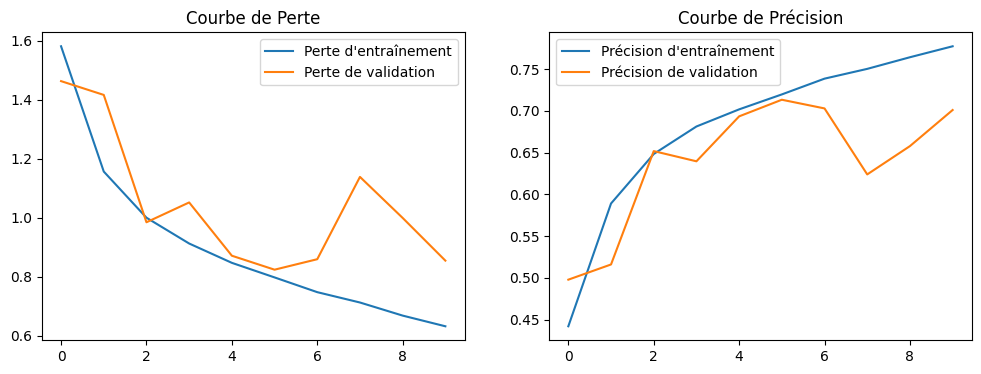

In [29]:
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [30]:
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


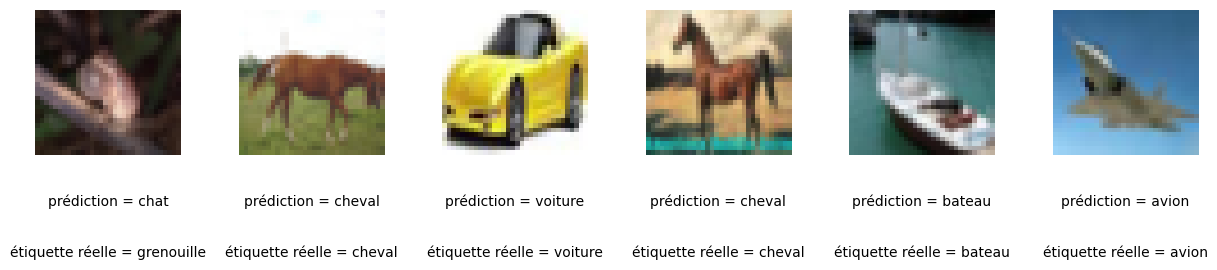

In [31]:
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)

plt.show()

# Modèle en utilisant le transfert learning VGG16

In [32]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16

In [33]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [34]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [35]:
model_transfer = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_transfer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [36]:
epochs = 10
batch_size = 64

history_transfer = model_transfer.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

test_loss, test_accuracy = model_transfer.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 555s 886ms/step - accuracy: 0.4062 - loss: 1.6796 - val_accuracy: 0.5627 - val_loss: 1.2583
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 561s 884ms/step - accuracy: 0.5481 - loss: 1.2796 - val_accuracy: 0.5785 - val_loss: 1.2035
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 561s 883ms/step - accuracy: 0.5682 - loss: 1.2283 - val_accuracy: 0.5845 - val_loss: 1.1805
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 561s 881ms/step - accuracy: 0.5862 - loss: 1.1776 - val_accuracy: 0.5972 - val_loss: 1.1578
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 881ms/step - accuracy: 0.5938 - loss: 1.1464 - val_accuracy: 0.5979 - val_loss: 1.1472
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 550s 881ms/step - accuracy: 0.6064 - loss: 1.1214 - val_accuracy: 0.6116 - val_loss: 1.1206
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 881ms/step - accuracy: 0.6117 - loss: 1.1084 - val_accuracy: 0.6138 - val_loss: 1.1121
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 595s 933ms/step - accuracy: 0.6201 -

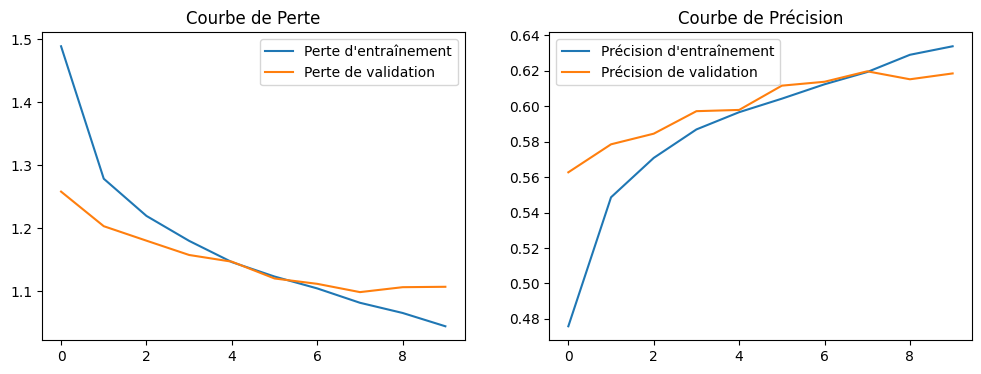

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['loss'], label='Perte d\'entraînement')
plt.plot(history_transfer.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_transfer.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()